In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [41]:
pg = pd.read_csv('Playground_Series.csv')
pg.head()

,store_sales,unit_sales,total_children,num_children_at_home,avg_cars_at_home,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,8.61,3,2,2,2,10.30,1,0,32,36509,0,0,0,0,0,62.09
1,5.00,2,4,0,3,6.66,1,0,1,28206,1,0,0,0,0,121.80
2,14.08,4,0,0,3,21.30,1,0,26,21215,1,0,0,0,0,83.51
3,4.02,3,5,0,0,14.80,0,1,36,21215,1,0,0,0,0,66.78
4,2.13,3,5,0,3,17.00,1,1,20,27694,1,1,1,1,1,111.51


In [42]:
pgQuantitative = add_constant(pg.drop(columns=['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist', 'cost']))

In [43]:
pgQuantitative

,const,store_sales,unit_sales,total_children,num_children_at_home,avg_cars_at_home,gross_weight,units_per_case,store_sqft
0,1.0,8.61,3,2,2,2,10.30,32,36509
1,1.0,5.00,2,4,0,3,6.66,1,28206
2,1.0,14.08,4,0,0,3,21.30,26,21215
3,1.0,4.02,3,5,0,0,14.80,36,21215
4,1.0,2.13,3,5,0,3,17.00,20,27694
...,...,...,...,...,...,...,...,...,...
360331,1.0,7.60,4,5,5,3,13.50,33,30268
360332,1.0,14.44,4,4,0,4,18.80,18,20319
360333,1.0,10.74,3,0,0,2,11.30,35,30584
360334,1.0,11.04,3,1,0,3,10.20,14,30584


In [44]:
vif = pd.DataFrame()
vif['Features'] = pgQuantitative.columns
vif['VIF'] = [variance_inflation_factor(pgQuantitative, i) for i in range (len(pgQuantitative.columns))]

In [45]:
vif #No correlated variables

,Features,VIF
0,const,54.940362
1,store_sales,1.304613
2,unit_sales,1.315524
3,total_children,1.162897
4,num_children_at_home,1.158552
5,avg_cars_at_home,1.015651
6,gross_weight,1.002178
7,units_per_case,1.000463
8,store_sqft,1.002808


In [46]:
oneHotEncoded = pd.get_dummies(data=pg, columns=['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist'])

In [47]:
oneHotEncoded.head()

,store_sales,unit_sales,total_children,num_children_at_home,avg_cars_at_home,gross_weight,units_per_case,store_sqft,cost,recyclable_package_0,...,coffee_bar_0,coffee_bar_1,video_store_0,video_store_1,salad_bar_0,salad_bar_1,prepared_food_0,prepared_food_1,florist_0,florist_1
0,8.61,3,2,2,2,10.30,32,36509,62.09,0,...,1,0,1,0,1,0,1,0,1,0
1,5.00,2,4,0,3,6.66,1,28206,121.80,0,...,0,1,1,0,1,0,1,0,1,0
2,14.08,4,0,0,3,21.30,26,21215,83.51,0,...,0,1,1,0,1,0,1,0,1,0
3,4.02,3,5,0,0,14.80,36,21215,66.78,1,...,0,1,1,0,1,0,1,0,1,0
4,2.13,3,5,0,3,17.00,20,27694,111.51,0,...,0,1,0,1,0,1,0,1,0,1


In [48]:
oneHotEncoded.columns

Index(['store_sales', 'unit_sales', 'total_children', 'num_children_at_home',
       'avg_cars_at_home', 'gross_weight', 'units_per_case', 'store_sqft',
       'cost', 'recyclable_package_0', 'recyclable_package_1', 'low_fat_0',
       'low_fat_1', 'coffee_bar_0', 'coffee_bar_1', 'video_store_0',
       'video_store_1', 'salad_bar_0', 'salad_bar_1', 'prepared_food_0',
       'prepared_food_1', 'florist_0', 'florist_1'],
      dtype='object')

In [63]:
fit1 = sm.ols('cost~unit_sales+total_children+avg_cars_at_home+store_sqft+recyclable_package_0+recyclable_package_1+low_fat_0+low_fat_1+coffee_bar_0+coffee_bar_1+video_store_0+video_store_1+salad_bar_0+salad_bar_1+prepared_food_0+prepared_food_1+florist_0+florist_1', data=oneHotEncoded).fit()

In [64]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   cost   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     652.1
Date:                Fri, 31 Mar 2023   Prob (F-statistic):               0.00
Time:                        12:54:49   Log-Likelihood:            -1.7326e+06
No. Observations:              360336   AIC:                         3.465e+06
Df Residuals:                  360324   BIC:                         3.465e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               23.8262      0.083    288.633      0.000      23.664      23.988
unit_sales              -0.4412      0.065     -6.837      0.000      -0.568      -0.315
total_children          -0.2128      0.034     -6.351      0.000      -0.279      -0.147
avg_cars_at_home         0.7645      0.046     16.724      0.000       0.675       0.854
store_sqft              -0.0003   1.03e-05    -29.803      0.000      -0.000      -0.000
recyclable_package_0    11.9431      0.065    183.074      0.000      11.815      12.071
recyclable_package_1    11.8831      0.064    184.987      0.000      11.757      12.009
low_fat_0               11.9552      0.065    182.856      0.000      11.827      12.083
low_fat_1               11.8710      0.068    173.663      0.000      11.737      12.005
coffee_bar_0            11.3907      0.090    126.192      0.000      11.214      11.568
coffee_bar_1            12.4356      0.065    189.902      0.000      12.307      12.564
video_store_0           14.4890      0.092    157.012      0.000      14.308      14.670
video_store_1            9.3373      0.088    105.588      0.000       9.164       9.511
salad_bar_0              8.5836      2.753      3.118      0.002       3.188      13.980
salad_bar_1             15.2426      2.753      5.536      0.000       9.846      20.639
prepared_food_0         14.9095      2.753      5.416      0.000       9.514      20.305
prepared_food_1          8.9167      2.754      3.238      0.001       3.520      14.314
florist_0               14.3928      0.086    167.417      0.000      14.224      14.561
florist_1                9.4335      0.078    120.642      0.000       9.280       9.587
==============================================================================
Omnibus:                   324284.186   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            21738.319
Skew:                           0.033   Prob(JB):                         0.00
Kurtosis:                       1.799   Cond. No.                     2.40e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.21e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [68]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x = pg.iloc[:, :15]
y = pg.cost
fit = lm.fit(x, y)

In [71]:
fit.score(x, y)

0.01952979479064698

<AxesSubplot:>

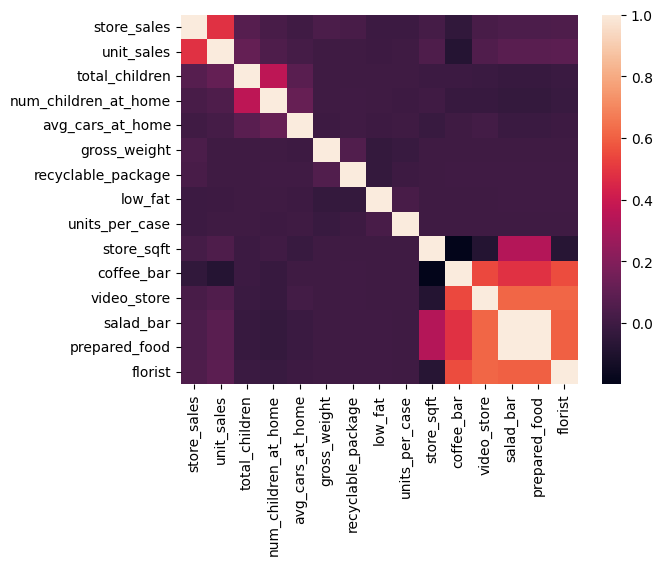

In [73]:
sns.heatmap(pg.drop(columns='cost').corr(), )